<center>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/adsp_logo.png?raw=1">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Lloyd-Max Quantizer

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/n2xuCE2dKeo" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Idea:** Wouldn't it be helpful if we choose our **quantization steps smaller** where **signal samples appear most often**, to reduce the quantization error there, and make the quantization step size (and also the error) larger, where there are only a few samples?

This is the idea behind the Lloyd-Max quantizer (see also the Book: N.S. Jayant, P. Noll: “Digital coding of waveforms“).

**Observe** that this is not quite the same as for $\mu$-law companding. There, the **small** values get the smallest quantization step sizes, here, the **most likely** values get the smallest quantization steps sizes.

This is a type of non-uniform quantizer, which is adapted to the signals pdf. It basically minimizes the expectation of the quanization power (the expectaion of the squared signal, or its second moment), given the pdf of the signal to quantize.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/3TBS2vnBxow" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Let's call our Quantisation function Q(x) (this is quantization followed by reverse quantization). You can also think of non-uniform quantization as first applying this non-linear function and then to use uniform quantization. Then the expectation of our quantization power is:

$$
D=E((x-Q(x))^2)
$$

Observe that we use the square here, and not for instance the magnitude of the error, because the square leads to an easier solution for minimum, which we would like to find.

Our **goal** is to **minimize this expectation** of the quantisation error power D.
Starting with the pdf of our signal, the result should be our quantisation intervals and reconstruction values. Since we now assume non-uniform intervals, we need to give those intervals and their reconstruction values names, which can be see in the following graphic:

<center>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/lloyd_max.PNG?raw=1" width='600'>
</center>

You can imagine to have the $b_k$ and $y_k$ stored in lookup tables in the quantizer and dequantizer, together with the quantization indices which are assigned to these quantization intervals. The encoder tests between which $b_k$ a values falls, and looks up the corresponding quantization index, which is then transmitted to the receiver with the de-quantizer, which then looks up the reconstruction value $y_k$ for the received quantization index.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/1Fr1Qo2-nEk" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The encoder knows the $b_k$, and decides in which interval (what we called $\Delta$ before) the sample lies, and assigns the interval index k to it, as before (remember: only the index k is transmitted to the decoder). The decoder takes this index, and assigns the reconstructed value $y_k$ to it, also as before.


We call $b_k$ the decision boundaries, in the A/D converter or encoder (each interval gets an index as before), and on the decoding side we have the $y_k$ as the reconstruction values for each index from the encoding side. <br>
In the multidimensional case, they are also called a “**codeword**”.

So using these definitions, and the pdf  our  the measured **probability distribution** of our signal p(x),  we can re-write our equation for the error power or distortion:

$$ \large
D=E((x-Q(x))^2)=\int_{-\infty} ^ \infty (x-Q(x))^2 p(x) dx
$$

we can now subdivide the integral over the quantisation intervals, assuming we have M quantization intervals, by just adding the quantization error power of all the quantisation intervals (see also: Wikipedia: quantization (signal processing)):

$$ \large
D=\sum _ {k=1} ^ {M }\int _ {b_{k-1}} ^ {b_k} (x-y_k)^2 p(x) dx$$

We would now like to have the minimum of this expression for the decision boundaries $b_k$ and the reconstruction values $y_k$. Hence we need to take the first derivative of the distortion D with respect to those variables and obtain the zero point.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/4wLah9Agrnw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Lets start with the decision boundaries $b_k$:

$$\large
\frac{\partial D} {\partial {b_k}}=0$$

To obtain this derivative, we could first solve the integral, over 2 neighbouring quantisation intervals, because each decision interval $b_k$ appears in two intervals (one where it is the upper boundary, and one where it it the lower boundary).

$$ \large
D_k=\int _ {b_k }^ {b_{k+1}} (x-y_{k+1})^2 p(x) dx+ \int _ {b_{k-1}} ^ {b_{k}} (x-y_{k})^2 p(x) dx
$$

Here we cannot really get a closed form solution for a general probability function p(x). Hence, to simplify matters, we make the **assumption** that p(x) is **approximately constant** over our 2 neighbouring quantisation intervals. This means we assume that our quantisation intervals are small in comparison with the changes of p(x)!

**We need to keep this assumption in mind, because the derived algorithm is based on this assumption!**

Hence we can set:

$$p(x)=p$$

Using this simplification we can now solve this integral:

$$ \large
\frac{D_k} {p}= \frac{(b_k-y_k)^3}{ 3} - \frac{(b_{k-1}-y_k)^3} {3 }+ \frac{(b_{k+1}-y_{k+1})^3} { 3} -\frac{(b_{k}-y_{k+1})^3} {3} $$

#### Solving using Sympy

In [1]:
# Imports
from sympy import Eq, symbols, Integral, Derivative, simplify, solve

# Define Symbols
x, yk, yk1, bk, bkp1, bkm1, p = symbols('x y_k y_{k+1} b_k b_{k+1} b_{k-1} p', real=True)

In [6]:
# Dk Integral
Dk = Integral((x-yk1)**2*p,(x,bk,bkp1)) + Integral((x-yk)**2*p,(x,bkm1,bk))
display(Dk)
simplify(Dk.doit())

Integral(p*(x - y_k)**2, (x, b_{k-1}, b_k)) + Integral(p*(x - y_{k+1})**2, (x, b_k, b_{k+1}))

p*(-3*b_k**2*y_k + 3*b_k**2*y_{k+1} + 3*b_k*y_k**2 - 3*b_k*y_{k+1}**2 + b_{k+1}**3 - 3*b_{k+1}**2*y_{k+1} + 3*b_{k+1}*y_{k+1}**2 - b_{k-1}**3 + 3*b_{k-1}**2*y_k - 3*b_{k-1}*y_k**2)/3

Since we now have a closed form solution, we can easily take the derivative with respect to $b_k$ (which only influences $D_k$ in $D$, hence we can drop the k in the derivative):

$$ \large
\frac{\partial D/p}  {\partial {b_k}} = (b_k -y_k)^2 -(b_k -y_{k+1})^2$$

In [7]:
display(Derivative(Dk/p,bk))
simplify(Derivative(Dk/p,bk).doit())

Derivative((Integral(p*(x - y_k)**2, (x, b_{k-1}, b_k)) + Integral(p*(x - y_{k+1})**2, (x, b_k, b_{k+1})))/p, b_k)

-2*b_k*y_k + 2*b_k*y_{k+1} + y_k**2 - y_{k+1}**2

We can set this then to zero, and observing that $y_{k+1}>b_k$ (see above image), we can take the positive square root of both sides:

$$ \large
(b_k -y_k)^2 -(b_k -y_{k+1})^2=0
$$

$$ \large
(b_k -y_k) =( y_{k+1} - b_k)
$$

$$ \large
b_k= \frac{y_{k+1}+
y_k} { 2}$$

This means that we put our decision boundaries right in the middle of two reconstruction values. But remember, this is only optimal if we assume that the signals pdf is roughly constant over the 2 quantisation intervals! This approach is also called the “**nearest neighbour**”, because any signal value or data point is always quantized to the **nearest reconstruction value**. This is one important result of this strategy.

In [9]:
Eq_bk = Eq(simplify(Derivative(Dk/p,bk).doit()),0)
display(Eq_bk)
display(Eq(bk,solve(Eq_bk,bk)[0]))

Eq(-2*b_k*y_k + 2*b_k*y_{k+1} + y_k**2 - y_{k+1}**2, 0)

Eq(b_k, y_k/2 + y_{k+1}/2)

Now we have the decision boundaries, but we still need the reconstruction values $y_k$. To obtain them, we can again take the derivative of D, and set it to zero. Here we cannot start with an assumption of a uniform pdf, because we would like to have a dependency on a non-uniform pdf. We could make this assumption before, because we only assumed it for the (small) quantisation intervals. This can be true in practice also for non-uniform pdf's, if we have enough quantisation intervals.

But to still have the dependency on the pdf, for the reconstruction values $y_k$ we have to start at the beginning, take the derivative of the original formulation of D.

$$ \large
D=\sum_{k=1} ^M \int _{b_{k-1}}^ {b_k} (x-y_k)^2 p(x) dx$$


Here we have the pdf p(x) and the reconstruction values (codewords) $y_k$. Now we start with taking the derivative with respect to the reconstruction value $y_k$ and set it to 0:

$$ \large
\frac{\partial D} {\partial {y_k}}=-\sum_ {k=1} ^ {M} \int_{b_{k-1}} ^{b_k} 2 \cdot (x-y_k) p(x) dx = 0
$$

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/DTeqd_PFbQc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [10]:
from sympy import Function, Sum, Indexed
p_x = Function('p')(x)
M, k = symbols('M k', real=True, positive=True)

In [11]:
D = Sum(Integral((x-yk)**2*p_x,(x,bkm1,bk)),(k,1,M))
display(D)
display(Derivative(D,yk))

Sum(Integral((x - y_k)**2*p(x), (x, b_{k-1}, b_k)), (k, 1, M))

Derivative(Sum(Integral((x - y_k)**2*p(x), (x, b_{k-1}, b_k)), (k, 1, M)), y_k)

Since the $y_k$ is only in 1 interval, the sum disappears:

$$ \large
\frac{\partial D}{\partial {y_k}}=- \int _ {b_{k-1}}^{b_k} 2 \cdot (x-y_k) p(x) dx = 0
$$


In [12]:
display(Derivative(Integral((x-yk)**2*p_x,(x,bkm1,bk)),yk))
display(simplify(Derivative(Integral((x-yk)**2*p_x,(x,bkm1,bk)),yk).doit()))

Derivative(Integral((x - y_k)**2*p(x), (x, b_{k-1}, b_k)), y_k)

-2*Integral(x*p(x), (x, b_{k-1}, b_k)) - 2*Integral(-y_k*p(x), (x, b_{k-1}, b_k))

Since we have a sum, we can split this integral in 2 parts (and remove the - sign):


$$ \large
\int _ {b_{k-1}}^{b_k} 2 \cdot x p(x) dx -\int _{b_{k-1}} ^ {b_k} 2 \cdot y_k p(x) dx = 0
$$

$$ \large
\int _ {b_{k-1}} ^ {b_k}   x \cdot p(x) dx -y_k \cdot \int_ {b_{k-1}} ^ {b_k}  p(x) dx = 0
$$

Hence we get the result

$$ \large
y_k = \frac{\int _ {b_{k-1}}^ {b_k}   x \cdot p(x) dx}  {\int _{b_{k-1}} ^{b_k}  p(x) dx}
$$

In [15]:
display(Eq(-2*(Integral(x*p_x,(x,bkm1,bk)) - Integral(yk*p_x,(x,bkm1,bk))),0))
Eq_yk=Eq(-2*(Integral(x*p_x,(x,bkm1,bk))),-2*yk*Integral(p_x,(x,bkm1,bk)))
display(Eq_yk)
Eq(yk,solve(Eq_yk,yk)[0])

Eq(-2*Integral(x*p(x), (x, b_{k-1}, b_k)) + 2*Integral(y_k*p(x), (x, b_{k-1}, b_k)), 0)

Eq(-2*Integral(x*p(x), (x, b_{k-1}, b_k)), -2*y_k*Integral(p(x), (x, b_{k-1}, b_k)))

Eq(y_k, Integral(x*p(x), (x, b_{k-1}, b_k))/Integral(p(x), (x, b_{k-1}, b_k)))

Observe that we now got a result without making any assumptions on p(x).

This can be interpreted as a **conditional expectation** of our signal value over the quantization interval (given the signal is in this interval), or also its “**centroid**” as reconstruction value (codeword).

- The value in the numerator can be seen as the expectation value of  our signal in the interval.
- The denominator can be seen as the probability of that signal being in that interval.

Hence it can be interpreted as: Given the signal is inside the interval, this is its average or expected value.

Since the decision boundaries $b_k$ depend on the reconstruction values $y_k$, and the $y_k$ in turn depend on the $b_k$, we need to come up with a way to compute them. The approach for this is an **iterative algorithm**:

<ol>
  <li>Decide on M, start (initialize the iteration) with a <b> random </b> assignment of M <b>reconstruction values </b> (codewords) $y_k$</li>
  <li>Using the reconstruction values $y_k$, compute the <b>boundary values</b> $b_k$ as mid-points between 2 reconstruction values / codewords (<b>nearest neighbour rule</b>)</li>
  <li>Using the pdf of our signal and the boundary values $b_k$, update, <b>compute new reconstruction values (codewords) $y_k$ as centroids or conditional expectation over the quantisation areas between $b_k$ and $b_{k-1}$</b></li>
    <li>Go to 2) until update is sufficiently small (&lt; epsilon).</li>
</ol>

This algorithm usually converges (it finds an equilibrium and doesn't change anymore), and it results in the minimum distortion D.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/nPk1vHD6S8s" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Example 1 for Max-Lloyd Interation

Assume we have a signal x between $0\leq x \leq 1$, uniformly distributed (p(x)=1 on this interval) and we want to have 2 reconstruction values/ codewords $y_k$, and hence 3 boundaries $b_k$ (where $b_0=0$ and $b_2=1$), we need to find only $b_1$.

1) **Random initialization:** $y_1=0.3$, $y_2=0.8$<br>
2) **Nearest neighbour:** $b_1=(0.3+0.8)/2=0.55$<br>
3) **Conditional expectation:** <br>

$$ \large
y_k = \frac{\int_{b_{k-1}}^ {b_k}   x \cdot p(x) dx} {\int_ {b_{k-1}}^{b_k}  p(x) dx}$$

now we use that $p(x)=1$.

$$
y_1 = \frac{\int_{0} ^{0.55}   x  dx} {\int _ {0} ^ {0.55}  1 dx}=\frac{0.55^2 /2}{ 0.55 }= 0.275
$$
<br>
$$
y_2 = \frac{\int_{0.55} ^{1}   x  dx} {\int _ {0.55} ^ {1}  1 dx}=\frac{1/2-0.55^2/2}{1- 0.55 }= 0.775
$$<br>

4) Go to 2), **nearest neighbour:**
$b_1=(0.275+0.775)/2=0.525$

3) **Conditional expectation:**<br>

$y_1 = \frac{0.525^2 /2}{ 0.525} = 0.26250$

$y_2 =\frac{1/2-0.525^2 / 2} {1- 0.525} =  0.76250$

and so on until it doesn't change much any more. This should converge to $y_1=0.25$, $y_2=0.75$, and $b_1=0.5$.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/5rNDlO5xYv0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [16]:
import numpy as np
from scipy.integrate import quad

# Algorithm

def b_k(y):
    return (y.sum())/2

def y_k(b):
    return np.array([(quad(lambda x: x,0,b)[0]/quad(lambda x: 1,0,b)[0]),
           (quad(lambda x: x,b,1)[0]/quad(lambda x: 1,b,1)[0])])


In [17]:
y = np.array([0.3,0.8])
it = 100
epsilon=1e-5
b=0
for i in range(it):
    b_old=b
    b=b_k(y)
    if i>0 and (b_old-b)<=epsilon:
        print('Iteration:',i+1)
        print('[y1 y2]:',y)
        print('b:',b)
        break
    y=y_k(b)

Iteration: 14
[y1 y2]: [0.2500061 0.7500061]
b: 0.500006103515625


## Example 2

Like above, but now with a **non-uniform**, Laplacian pdf: $p(x)=e^{-0.5\cdot \mid x \mid}$
   
1) **Random initialization:** $y_1=0.3$ ,$y_2=0.8$ <br>
2) **Nearest neighbour:** $b_1=(0.3+0.8)/2=0.55$<br>
3) **Conditional expectation:**

$$ \large
y_k=\frac{\int _{b_{k-1}} ^{b_k} x \cdot p(x)dx}{\int _{b_{k-1}}^{b_k} p(x)dx}
$$


Now we need Python to compute the numerator integral, for $y_1$:

$$ \large
\int _0^{b_1} x \cdot p(x)dx= \int_0 ^{0.55} x \cdot e^{-0.5 \cdot \mid(x)\mid } dx
$$

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/8FFMFzZvXl0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [18]:
# Numerator
Num,Nerr=quad(lambda x: x*np.exp(-0.5*abs(x)),0,0.55)
Num

0.1261821715526608

For the denominator integral we get:
$$ \large
\int_0 ^{0.55} p(x)dx $$, hence:

In [19]:
# Denominator
Den,Derr=quad(lambda x: np.exp(-0.5*abs(x)),0,0.55)
Den

0.48085575355006305

and hence we obtain,

$$y_1= \frac {Num}{ Den} = \frac{0.12618 }{0.48086} = 0.26240$$

For $y_2$ we get:

In [20]:
Num,Nerr=quad(lambda x: x*np.exp(-0.5*abs(x)),0.55,1)
print ("Num = ",Num)
Den,Derr=quad(lambda x: np.exp(-0.5*abs(x)),0.55,1)
print ("Den = ",Den)

print(Num/Den)

Num =  0.23463387017153867
Den =  0.3060829270246701
0.7665696105703645


Hence $y_2= 0.7665$.
Go back from here to step 2 until convergence.

In [21]:
def b_k(y):
    return (y.sum())/2

def y_k(b):
    return np.array([(quad(lambda x: x*np.exp(-0.5*abs(x)),0,b)[0]/quad(lambda x: np.exp(-0.5*abs(x)),0,b)[0]),
           (quad(lambda x: x*np.exp(-0.5*abs(x)),b,1)[0]/quad(lambda x: np.exp(-0.5*abs(x)),b,1)[0])])

In [22]:
y = np.array([0.3,0.8])
it = 100
epsilon=1e-9
b=0
for i in range(it):
    b_old=b
    b=b_k(y)
    if i>0 and (b_old-b)<=epsilon:
        print('Iteration:',i+1)
        print('[y1 y2]:',y)
        print('b:',b)
        break
    y=y_k(b)

Iteration: 28
[y1 y2]: [0.23001919 0.7282855 ]
b: 0.47915234324165445


# **Python Example: Max-Lloyd Quantization of a speech signal.**

Run these code cells:


In [23]:
!pip install ffmpeg-python
!pip install PySoundFile
import soundfile as sf

In [25]:
#@title Recording audio from microphone, run this setup: {display-mode: "form"}
"""
From:
https://colab.research.google.com/gist/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd/microphone-to-numpy-array-from-your-browser-in-colab.ipynb
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

  #Run this cell to record the audio:
audio, sr = get_audio()
print("sampling rate=", sr)
sf.write('sound.wav', audio, sr)

sampling rate= 48000


Data Type: int16 rate= 48000
centroids= [[ 1.36870219e+01]
 [ 4.00284978e+03]
 [-1.85340508e+03]
 [ 1.42969656e+03]
 [ 8.34050509e+03]
 [-2.65923043e+04]
 [-3.95767981e+03]
 [-4.87949179e+02]
 [ 5.88143913e+02]
 [ 1.99765625e+04]
 [-2.78489363e+03]
 [ 5.92391378e+03]
 [-1.07600560e+03]
 [ 2.55351896e+03]
 [-5.79252311e+03]
 [-1.64331250e+04]]
indices= [0 0 0 ... 0 0 0]
Example: centroids[2]= [-1853.40508207]
samples= [13.68702195 13.68702195 13.68702195 ... 13.68702195 13.68702195
 13.68702195]


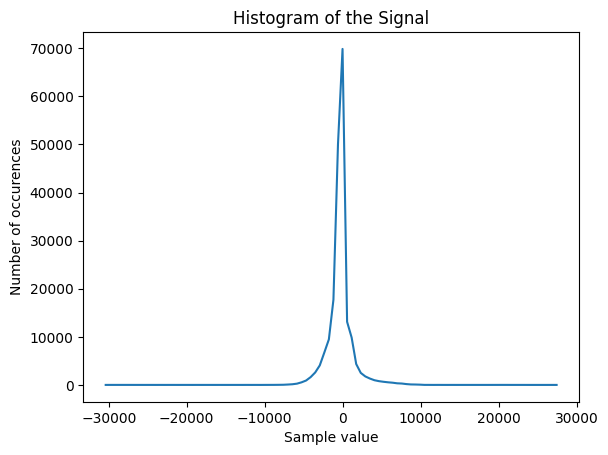

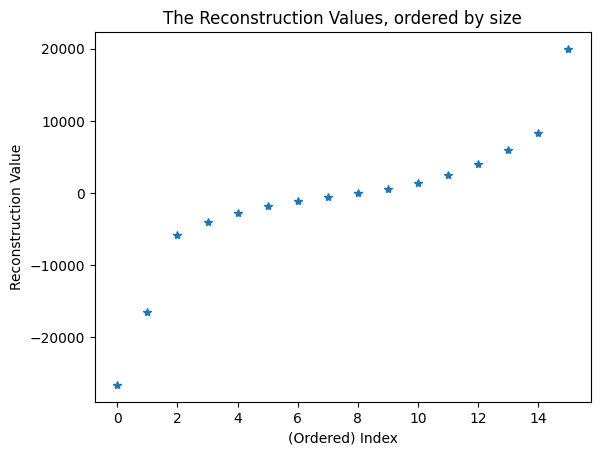

In [26]:
#@title Run this cell to do the Max-Lloyd quantization, using Python sklearn "K-means", also with 4bits/sample:
import scipy.io.wavfile as wav
import numpy as np
from IPython.display import Audio, display
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

filename = '/content/sound.wav' #@param {'type': 'string'}
rate, snd = wav.read(filename)
print("Data Type:", snd.dtype, "rate=", rate)
samples=snd
#s=np.sin(2*np.pi/rate*500.0*np.arange(0,len(snd)));
#samples=snd*s #This is the modulation

(hist, bin_edges)= np.histogram(samples, bins=100)
plt.plot(bin_edges[:-1], hist)
plt.title("Histogram of the Signal")
plt.xlabel("Sample value")
plt.ylabel("Number of occurences")


N =  4 #Number of bits
n_clusters = 2**N
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, algorithm='lloyd')
training_data=samples.reshape(-1, 1) #add an empty dimension
kmeans.fit(training_data)
centroids = kmeans.cluster_centers_ #recontruction values
print("centroids=", centroids)

plt.figure()
plt.plot(np.sort(centroids, axis=0),'*')
plt.xlabel('(Ordered) Index')
plt.ylabel('Reconstruction Value')
plt.title("The Reconstruction Values, ordered by size")

# Encoder: indices of Codewords for the signal
indices = kmeans.predict(samples.reshape(-1, 1))
print("indices=", indices)
print("Example: centroids[2]=", centroids[2])

# Decoder: centroids as reconstruction values of indices:
decoded=np.array([centroids[ind] for ind in indices.tolist()])

samples=decoded[:,0] #remove empty dimension
print("samples=", samples)
#end signal processing
samples=np.clip(samples,-32000,32000)

#Listen to it:
display(Audio(samples,rate=rate, autoplay=True))

Observe: The ordered reconstruction values correspond to the exponential expansion function of mu-law. Starting from reconstruction value zero, it indeed looks like an exponantial function. Hence, Lloyd-Max finds a similar solution to mu-law quantization!